<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Python - 14: Naive Bayes Classifier Algorithm Part 1

# Naive Bayes is basically a probability-based prediction model.

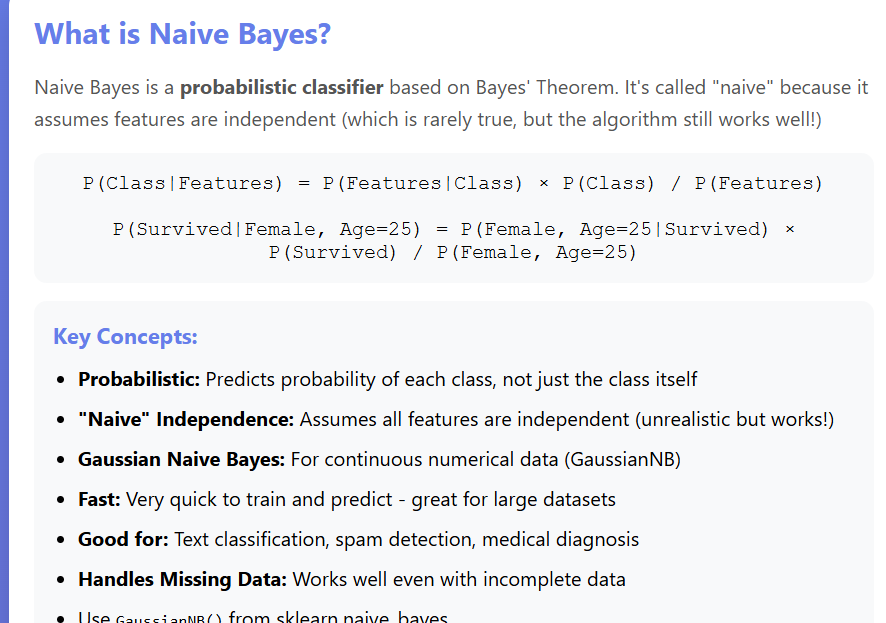

In [36]:

import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


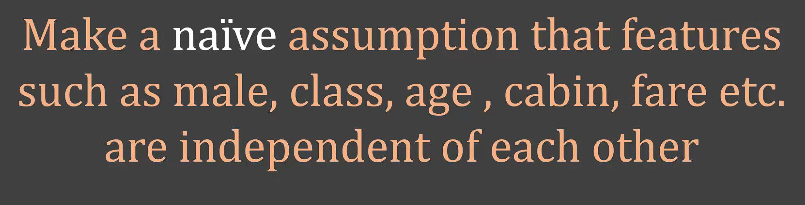

In [37]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [38]:
target=df.Survived
input=df.drop('Survived',axis=1)
input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [39]:
dummies=pd.get_dummies(input.Sex,dtype=int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
input=pd.concat([input,dummies],axis=1)
input=input.drop('Sex',axis=1)
input

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [41]:
input.drop('male',axis=1,inplace=True) # to avoid multicollinearity
input

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,NaN,23.4500,1
889,1,26.0,30.0000,0


In [42]:
input.isna().sum()

,0
Pclass,0
Age,177
Fare,0
female,0


In [43]:
input.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [44]:
input['Age']=input['Age'].fillna(input.Age.mean())
input.isna().sum()

,0
Pclass,0
Age,0
Fare,0
female,0


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input,target,test_size=0.3)
Y_test

,Survived
150,0
190,1
820,1
315,1
246,0
...,...
248,1
850,0
317,0
277,0


In [46]:
X_train

,Pclass,Age,Fare,female
373,1,22.000000,135.6333,0
825,3,29.699118,6.9500,0
724,1,27.000000,53.1000,0
616,3,34.000000,14.4000,0
581,1,39.000000,110.8833,1
...,...,...,...,...
251,3,29.000000,10.4625,1
68,3,17.000000,7.9250,1
638,3,41.000000,39.6875,1
593,3,29.699118,7.7500,1


In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
model=GaussianNB()
model.fit(X_train,Y_train)


GaussianNB()

In [49]:
model.score(X_test,Y_test)

0.7798507462686567

In [51]:
X_test[:10]

,Pclass,Age,Fare,female
150,2,51.00,12.5250,0
190,2,32.00,13.0000,1
820,1,52.00,93.5000,1
315,3,26.00,7.8542,1
246,3,25.00,7.7750,1
258,1,35.00,512.3292,1
708,1,22.00,151.5500,1
831,2,0.83,18.7500,0
566,3,19.00,7.8958,0
506,2,33.00,26.0000,1


In [54]:
Y_test[5:10]

,Survived
258,1
708,1
831,1
566,0
506,1


In [55]:
model.predict(X_test[5:10])

array([1, 1, 0, 0, 1])


Calculate the score using cross validation

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train,Y_train,cv=3)

array([0.78365385, 0.76923077, 0.73429952])

Yes — that’s exactly how it’s meant to be used.

Cross-validation is applied only on the training data

It estimates how well the model generalizes to unseen data

It is a more robust alternative to model.score(X_train, y_train)



---



---



---

#Exercise

Email spam detection: Features are word count [50, 100, 20, 200, 150] and link count [2, 5, 1, 10, 8]. Labels: [0=not spam, 1=spam]: [0, 1, 0, 1, 1]. Train and predict for: 120 words, 6 links.

In [61]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.naive_bayes import GaussianNB

df = pd.DataFrame({
    'word_count': [50, 100, 20, 200, 150],
    'link_count': [2, 5, 1, 10, 8],
    'spam': [0, 1, 0, 1, 1]
})

In [62]:
input=df.drop('spam',axis=1)
target=df.spam

In [63]:
model=GaussianNB()
model.fit(input,target)

GaussianNB()

In [65]:
model.predict([[120,6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

Encode categorical data: Weather ['sunny', 'rainy', 'cloudy', 'sunny'], Temperature ['hot', 'cold', 'mild', 'hot'], Play [1, 0, 1, 1]. Use pd.get_dummies() to encode, then train model.

In [66]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

df = pd.DataFrame({
    'weather': ['sunny', 'rainy', 'cloudy', 'sunny'],
    'temperature': ['hot', 'cold', 'mild', 'hot'],
    'play': [1, 0, 1, 1]
})

In [67]:
input=df.drop('play',axis=1)
target=df.play


In [69]:
dummies_temp=pd.get_dummies(df.temperature,dtype=int)
dummies_temp


,cold,hot,mild
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0


In [70]:
dummies_weather=pd.get_dummies(df.weather,dtype=int)
dummies_weather

,cloudy,rainy,sunny
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1


In [72]:
input=pd.concat([input,dummies_temp,dummies_weather],axis=1)
input

,weather,temperature,cold,hot,mild,cloudy,rainy,sunny
0,sunny,hot,0,1,0,0,0,1
1,rainy,cold,1,0,0,0,1,0
2,cloudy,mild,0,0,1,1,0,0
3,sunny,hot,0,1,0,0,0,1


In [75]:
input=input.drop(['weather','temperature','cold','cloudy'],axis=1)
input

,hot,mild,rainy,sunny
0,1,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,1


In [77]:
cross_val_score(GaussianNB(),input,target,cv=3)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


array([0.5, 0. , 1. ])

Complete pipeline: Simple passenger data - Class [1, 3, 2, 3, 1], Sex ['male', 'female', 'female', 'male', 'female'], Age [25, 35, NaN, 40, 30], Survived [0, 1, 1, 0, 1]. Handle missing values, encode Sex with get_dummies (avoiding dummy trap), train with 80/20 split, and predict.

In [78]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df = pd.DataFrame({
    'Pclass': [1, 3, 2, 3, 1],
    'Sex': ['male', 'female', 'female', 'male', 'female'],
    'Age': [25, 35, np.nan, 40, 30],
    'Survived': [0, 1, 1, 0, 1]
})

In [79]:
dummies=pd.get_dummies(df.Sex,dtype=int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [80]:
df=pd.concat([df,dummies],axis=1)
df

,Pclass,Sex,Age,Survived,female,male
0,1,male,25.0,0,0,1
1,3,female,35.0,1,1,0
2,2,female,NaN,1,1,0
3,3,male,40.0,0,0,1
4,1,female,30.0,1,1,0


In [81]:
df['Age']=df['Age'].fillna(df.Age.mean())
df

,Pclass,Sex,Age,Survived,female,male
0,1,male,25.0,0,0,1
1,3,female,35.0,1,1,0
2,2,female,32.5,1,1,0
3,3,male,40.0,0,0,1
4,1,female,30.0,1,1,0


In [82]:
X=df.drop('Survived',axis=1)
target=df.Survived
X

,Pclass,Sex,Age,female,male
0,1,male,25.0,0,1
1,3,female,35.0,1,0
2,2,female,32.5,1,0
3,3,male,40.0,0,1
4,1,female,30.0,1,0


In [83]:
input=X.drop('Sex',axis=1)
#no need to care abt multicollinearity in
#naive bayes cos it assumes every feature independent of one another
input

,Pclass,Age,female,male
0,1,25.0,0,1
1,3,35.0,1,0
2,2,32.5,1,0
3,3,40.0,0,1
4,1,30.0,1,0


In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(input,target,test_size=0.2,random_state=42)

In [86]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [90]:
cross_val_score(GaussianNB(),X_train,Y_train,cv=2)

array([0.5, 0.5])

In [87]:
model.score(X_test,Y_test)

1.0

# Tutorial Python - 15: Naive Bayes Classifier Algorithm Part 2

In [128]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [130]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

We want to convert the message to a number by using count vectorizer technique

🧠 What is Count Vectorizer?

CountVectorizer converts text → numbers by counting word occurrences.

👉 Each document becomes a vector of word counts.

🔤 Simple idea

Text models cannot understand words, only numbers.

So Count Vectorizer:
1️⃣ Builds a vocabulary of all unique words
2️⃣ Counts how many times each word appears in each document

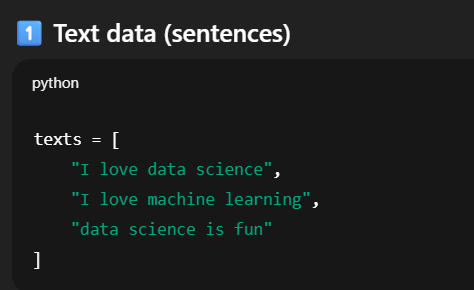

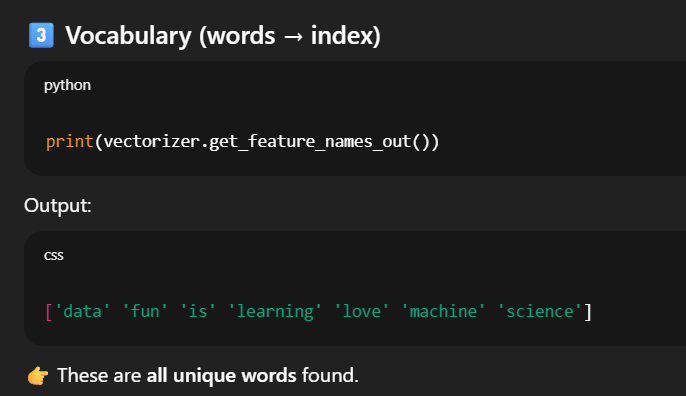

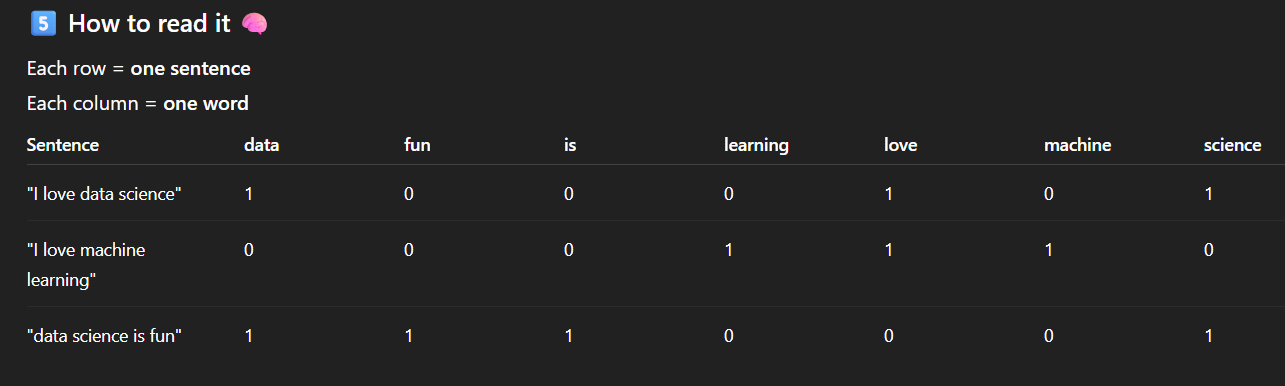

6️⃣ Key idea (very important 🔑)

CountVectorizer = count how many times each word appears

No meaning, no order — just counts 📊

In [182]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count=v.fit_transform(X_train.values)


In [183]:
X_train.values

array(['We have pizza if u want',
       "I'm watching lotr w my sis dis aft. So u wan 2 meet me 4 dinner at nite a not?",
       'MOON has come to color your dreams, STARS to make them musical and my SMS to give you warm and Peaceful Sleep. Good Night',
       ..., 'Am in gobi arts college', "1's finish meeting call me.",
       'All e best 4 ur driving tmr :-)'], dtype=object)

In [184]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [185]:
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [186]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_num=v.transform(emails)

What does transform() return? 🔢

👉 It returns numbers, not text

In [187]:
model.predict(emails_num)

array([0, 1])

In [188]:
test_num=v.transform(X_test)
model.score(test_num,y_test)

0.9885139985642498



---



---



---

# Exercise
Text classification using CountVectorizer: Create a simple spam classifier with messages and labels. Train using MultinomialNB and predict on new emails.

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

messages = [
    "Free money now!!!",
    "Hi Bob, are we still meeting?",
    "Win a free iPhone today",
    "Let's grab lunch tomorrow"
]
labels = [1, 0, 1, 0] # 1=spam, 0=ham


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages,labels)

In [170]:
vectorizer=CountVectorizer()
X_train_count=vectorizer.fit_transform(X_train)

In [171]:
X_train_count.toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]])

In [172]:
vectorizer.get_feature_names_out()

array(['are', 'bob', 'free', 'grab', 'hi', 'iphone', 'let', 'lunch',
       'meeting', 'still', 'today', 'tomorrow', 'we', 'win'], dtype=object)

In [173]:
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [174]:
test_emails = [
    "Free prize winner",
    "Meeting at 3pm"
]
test_email_num=vectorizer.transform(test_emails)
test_email_num.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [175]:
model.predict(test_email_num)

array([1, 0])

In [176]:
X_test_num=vectorizer.transform(X_test)
X_test_num.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [177]:
y_test

[1]

In [178]:
model.score(X_test_num,y_test)

1.0